![Iscte Logo](https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg)

# Exploração do TAD Lista com implementação de listas ligadas
*Análise da complexidade de algoritmos*
---
**Relatório elaborado no âmbito da Unidade Curricular de Estruturas de Dados e Algoritmos do 1º ano da Licenciatura de Ciência de Dados**

Realizado por:
* 105289 - André Plancha - Turma CDA2
* 105289 - André Plancha - Turma CDA2
* 105289 - André Plancha - Turma CDA2
* 105220 - Tomás Ribeiro - Turma CDA2

Veja este notebook com o [nbViewer](https://nbviewer.org/github/notPlancha/Trabalho-de-Prog-2/blob/main/Fase%202.ipynb). O código total está em anexo.

# Introdução
Uma lista ligada é uma estrutura de dados que armazena elementos em uma ordem específica.
Foi implementado uma lista duplamente ligada que consiste numa lista ligada em que os elementos estão ligados de forma reciproca, ou seja, um elemento está ligado ao seguinte e o mesmo está ligado ao anterior.
E foi também implementado uma lista ligada circular onde a cabeça está ligada à cauda. Até agora, de um modo geral foram realizados alguns métodos sobre as implementações que permitem a gestão da mesma e implementamos também algoritmos de pesquisa binária e sequencial e os métodos de ordenação bubblesort e mergesort que vamos seguidamente fazer uma análise espácio-temporal.
O objetivo é tentar analisar a eficiência que cada algoritmo tem sobre como varia a sua ocupação no espaço bem como no tempo para assim poder perceber quanto tempo demora e quanto espaço ocupa a execução da pesquisa binária, o mergesort e bubblesort.
Para esse efeito iremos fazer testes ao desempenho dos algoritmos, representar graficamente as funções espaço e tempo, e descrever as observações retiradas desses mesmos gráficos. Utilizaremos este processo quer para lista ligada circular e a lista duplamente ligada.
Ao longo desta análise iremos formular hipóteses as quais iremos também comparar com os resultados empíricos obtidos.


In [26]:
# Imports TODO remove not needed
import random

from doubly_linked_list import DoublyLinkedList
from circular_linked_list import CircularLinkedList
from base_classes import LinkedList
from Testes_ao_codigo import fromListToDll, fromListToCll
from typing import List, Tuple
from timeit import Timer
from numpy import random
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm

FileSeed = 10
maxNLists = 100
nlistsForN = 50

# Metodologia
Para analisármos a complexidade temporal empiricamente, vamos usar a biblioteca <code>timeit</code>, em conjunto com a biblioteca <code>numpy</code>, para construir as nossas listas ligadas. Iremos usar uma seed pré-defenida de forma aos nossos testes. No fim, iremos usar <code>matplotlib</code> para analisar os tempos dos vários algorítmos graficamente. Para a nossa análise assintótica, iremos demostrar as conclusões tiradas, baseadas em como construimos o nosso algoritmo.

In [29]:
def randomLists(seed, nMax , eachNNLists):
    random.seed(seed)
    return [[random.randint(0, 10000, i) for _ in range(eachNNLists)] for i in range(nMax+1)]

def plotIt(title, xPoints, yPoints, axis = None):
    if axis is None:
        axis = plt
        plt.title(title)
    else:
        axis.set_title(title)
    axis.scatter(xPoints, yPoints)
    axis.xlabel('N')
    axis.ylabel('Tempo (s)')
def plotMethodTime(title, method):
    testArrays = randomLists(FileSeed, maxNLists, nlistsForN)
    X = []
    Y = []
    for i in tqdm(range(len(testArrays))):
        for j in testArrays[i]:
            X.append(len(j))
            LL = fromListToDll(j)
            Y.append(Timer(lambda: method(LL)).timeit(number=5))
    
    plotIt(title, X, Y)

# Mergesort
O mergesort é um algoritmo de ordenação que divide um vetor em dois sub-vetores e ordena cada um deles de forma recursiva, juntando-as de forma ordenada. A complexidade temporal do mergesort quando usado num vetor é de O(n log n), onde n é o número de elementos do vetor. Isto é porque divide o vetor em duas metades e demora um tempo linear para fundir os vetores.
Numa lista ligada, a nossa hipótese é que este algoritmo não sofre alterações na sua complexidade temporal, sendo este algorítmo não parece ter vantagens temporais ao ter um vetor em vês desta estrutura de dados. Consoante o nosso código, mostrado e explicado de seguida, este parece ser o caso, em qualquer uma das listas implementadas, sendo que a lista ser circular ou duplamente ligada não dá nenhuma vantagem ou desvantagem em termos de eficiciência temporal.
Em termos de eficiência espacial, este algoritmo tem a possibilidade de não precisar de O(n) de complexidade espacial, como demonstrado por [Tatham (2017)](https://www.chiark.greenend.org.uk/~sgtatham/algorithms/listsort.html). Na nossa análise, iremos verificar se conseguimos alcançar essa conquista.

In [ ]:
#TODO put mergeSort here

## Complexidade espacial
Este algorítmo vai ter uma complexidade espacial de O(log n), sendo que estamos a criar novas listas cada vez que entramos na recursividade, estas correndo 2 * log n vezes. Sendo que estas listasligam diretamente ao nó com o valor, em vês de criá-lo novamente, apenas <code>LinkedList.size</code> vai aumentar a memória.

## Complexidade temporal
De seguida irá ser criado os dados sobre o tempo de execução do algoritmo, e analisado.

  0%|          | 0/101 [00:00<?, ?it/s]

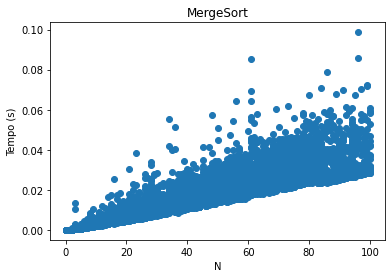

In [30]:
plotMethodTime('MergeSort', DoublyLinkedList.mergeSort)

# Bubblesort
O bubblesort é um algoritmo de ordenação que consiste em ordenar o vetor por seções ordenando em primeiro lugar o par constituido pelo primeiro e segundo elemento, de seguida ordenando o segundo e o terceiro até ao fim da lista. Se a este ponto o vetor ainda nao estiver ordenado repete-se o processo.

# Binary Search
O algoritmo de pesquisa binária é um algoritmo que pretende dizer se existe determinado elemento na lista. Parte-se do pressuposto que a lista esta ordenada. Consiste em analisar o elemento do meio e verificar se corresponde ao elemento procurado, se não for o algoritmo vai comparar se o numero procurado é maior ou menor do que o elemento e busca o elemento do meio a partir do meio. O processo repete-se até encontrar o elemento ou nocaso de nao encontrar até não haver mais elementos no vetor.

# Conclusão
